## Exp2

### EDA ON TABULAR DATA

In [1]:
import pandas as pd
df=pd.read_csv('Diabetes.csv')

In [2]:
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
df.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

In [5]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

<Axes: >

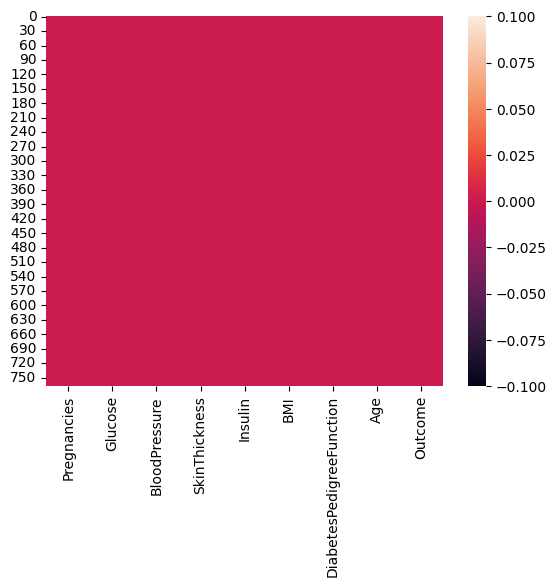

In [6]:
import seaborn as sns
sns.heatmap(df.isnull())

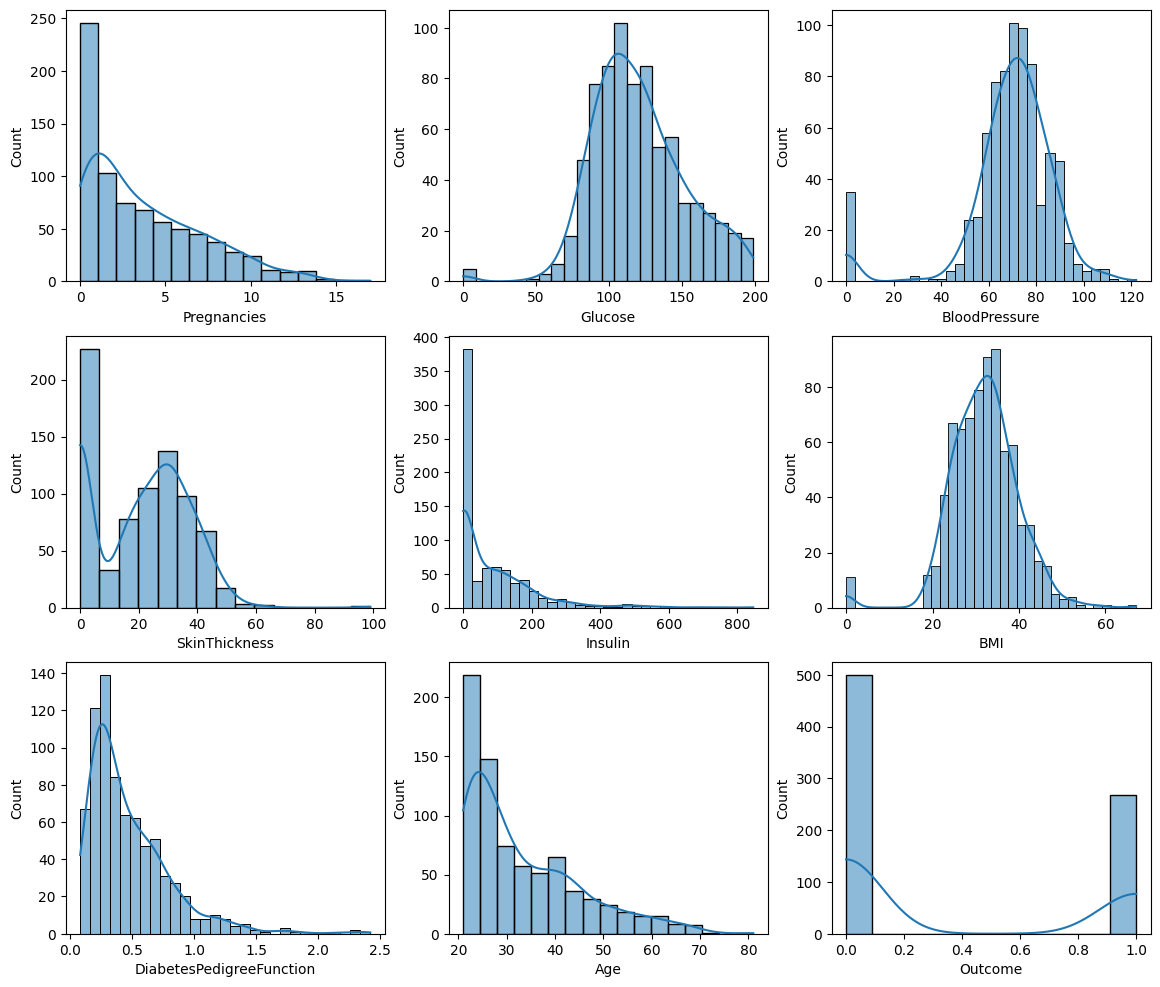

In [7]:
import matplotlib.pyplot as plt
cols=df.columns
plt.figure(figsize=(14,12))
for index,col in enumerate(cols):
    plt.subplot(3,3,index+1)
    sns.histplot(df[col],kde=True)

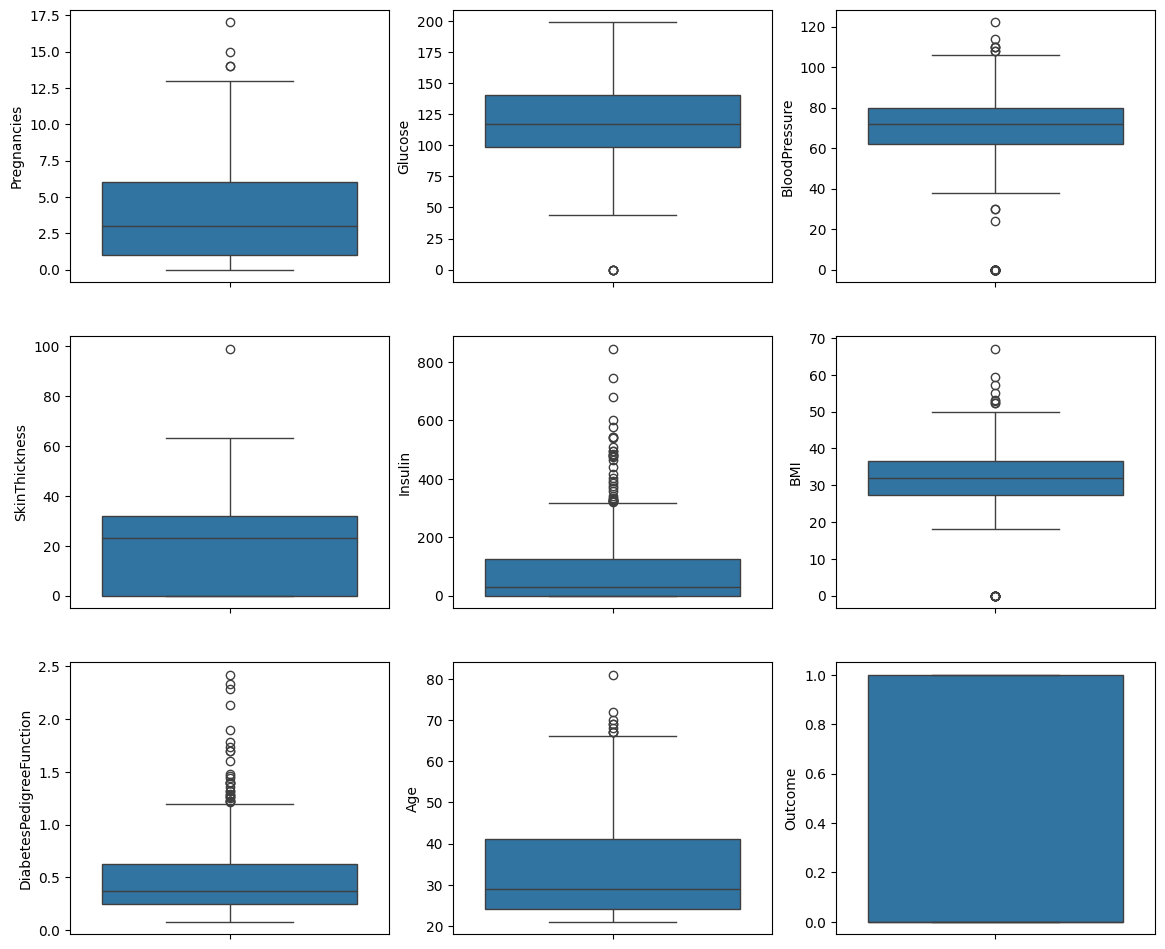

In [8]:
plt.figure(figsize=(14,12))
for index,col in enumerate(cols):
    plt.subplot(3,3,index+1)
    sns.boxplot(df[col])

<Axes: >

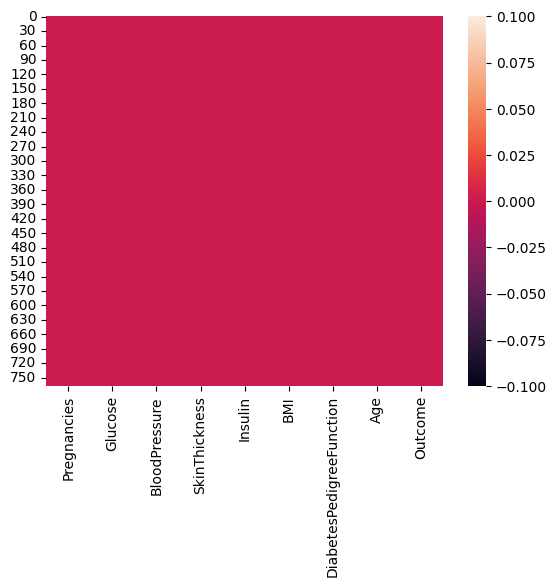

In [9]:
for col in cols:
    df.fillna(df[col].mean(),inplace=True)
sns.heatmap(df.isnull())

In [12]:
q1=df.quantile(0.25)
q3=df.quantile(0.75)
iqr=q3-q1
lb=q1-1.5*iqr
ub=q3+1.5*iqr

outliers=((df<lb)|(df>ub))
# print(df[outliers.any(axis=1)]) #This prints only the rows that contain at least one outlier.
df_no_outliers = df[~outliers.any(axis=1)] #it keeps only rows with no outliers.


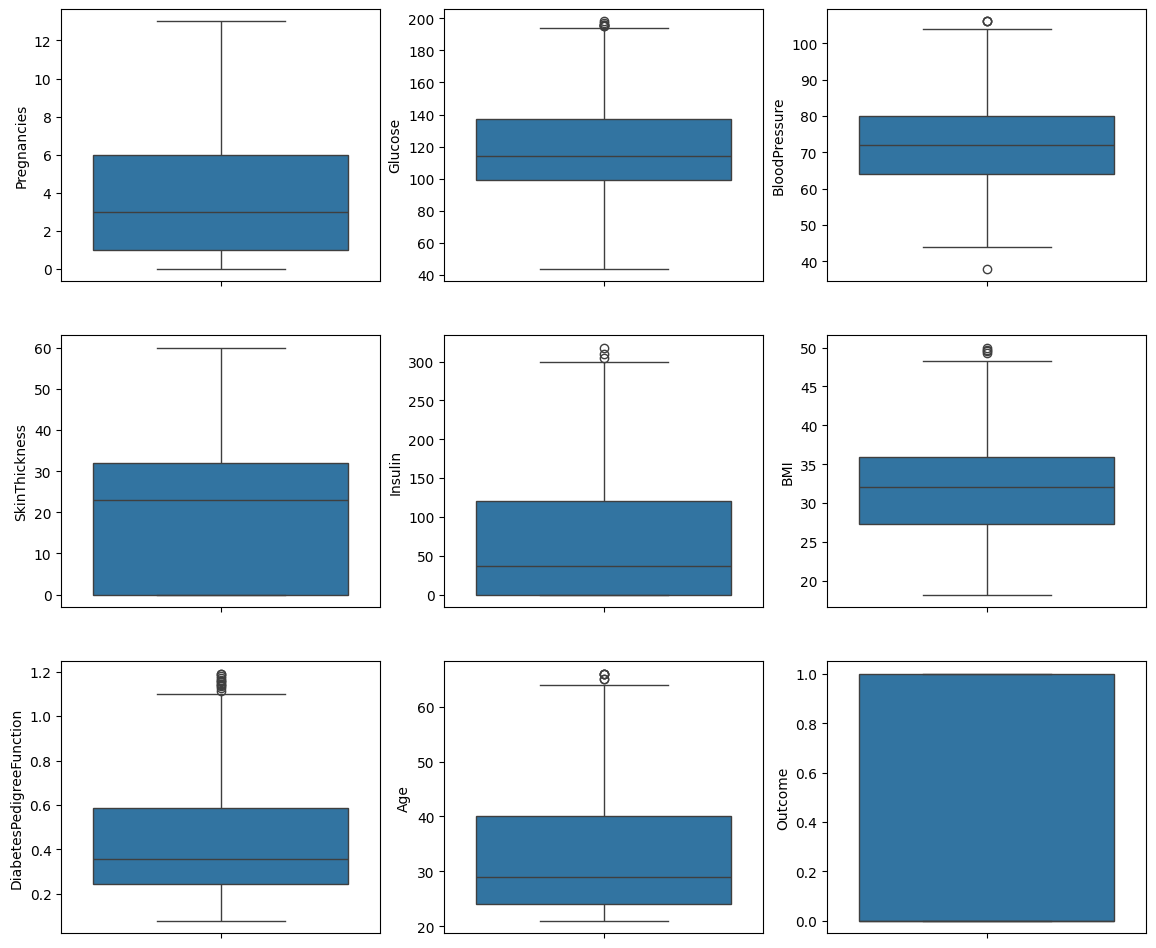

In [13]:
plt.figure(figsize=(14,12))
for index,col in enumerate(cols):
    plt.subplot(3,3,index+1)
    sns.boxplot(df_no_outliers[col])

In [ ]:
plt.pie(df['Class'].value_counts(),labels=['0','1'])

In [ ]:
from sklearn.feature_selection import SelectKBest,chi2
selector=SelectKBest(chi2,k=5)
X=df.drop('Class',axis=1)
y=df['Class']
selector.fit_transform(X,y)

select_feat=X.columns[selector.get_support()]
print(select_feat)
corr=df[select_feat].corr()
sns.heatmap(corr,annot=True)

### EXP2 EDA ON IMAGE

#### Using Glob package

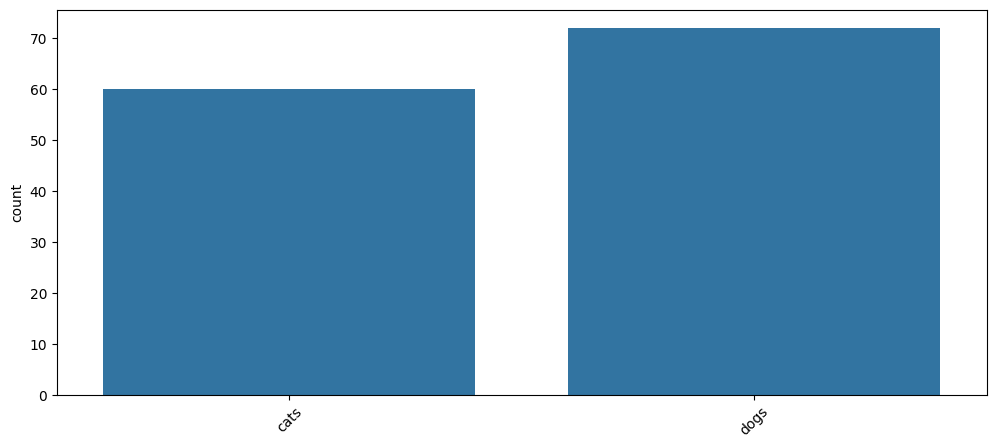

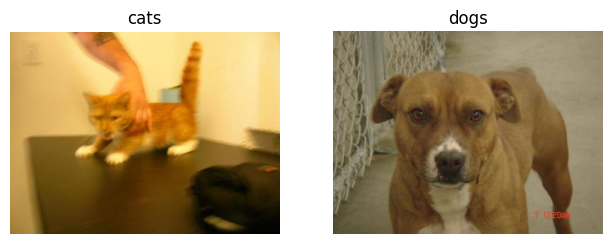

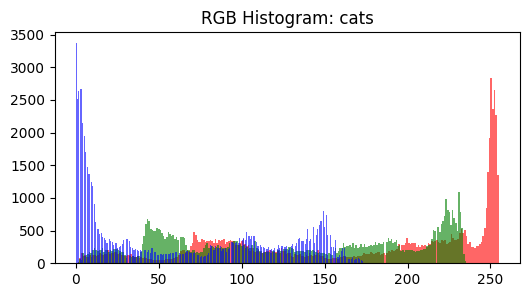

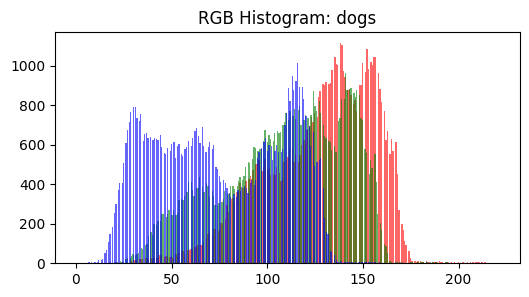

In [36]:
import glob
from PIL import Image
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Path to all images
all_image_paths = glob.glob("cat_dog/*/*.jpg")

# Extract class names from folder structure
class_names = [path.split("\\")[-2] for path in all_image_paths]

# Class Distribution Plot
plt.figure(figsize=(12, 5))
sns.countplot(x=class_names)
plt.xticks(rotation=45)
plt.show()

# Show Sample Images
plt.figure(figsize=(16, 10))
for i, cls in enumerate(list(set(class_names))):  # Convert set to list
    img_path = [path for path in all_image_paths if cls in path][0]
    img = Image.open(img_path)
    plt.subplot(3, 4, i + 1)
    plt.imshow(img)
    plt.title(cls)
    plt.axis('off')
plt.show()

# RGB Histogram
for cls in list(set(class_names))[:5]:  # Convert set to list
    img_path = [path for path in all_image_paths if cls in path][0]
    img = Image.open(img_path).resize((256, 256))
    img_arr = np.array(img)
    plt.figure(figsize=(6, 3))
    plt.title(f"RGB Histogram: {cls}")
    for i, color in enumerate(('r', 'g', 'b')):
        plt.hist(img_arr[:, :, i].flatten(), bins=256, color=color, alpha=0.6)
    plt.show()


#### using  OS and cv2

<BarContainer object of 2 artists>

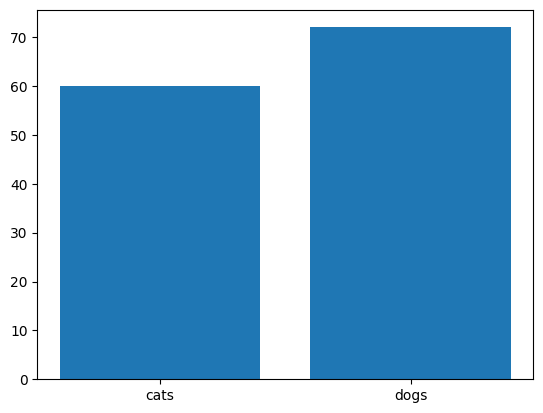

In [1]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt

dataset_path='cats_dogs'
classes=os.listdir(dataset_path)

img_cnts={}
img_shapes=[]
all_pixels=[] #for pixel level distribution check
for label in classes:
    label_dir=os.path.join(dataset_path,label)
    imgs=os.listdir(label_dir)
    img_cnts[label]=len(imgs)

    for img_file in imgs:
        img_path=os.path.join(label_dir,img_file)
        image=cv2.imread(img_path)
        if image is not None:
            img_shapes.append(image.shape)
            all_pixels.append(image.flatten())
plt.bar(img_cnts.keys(),img_cnts.values())


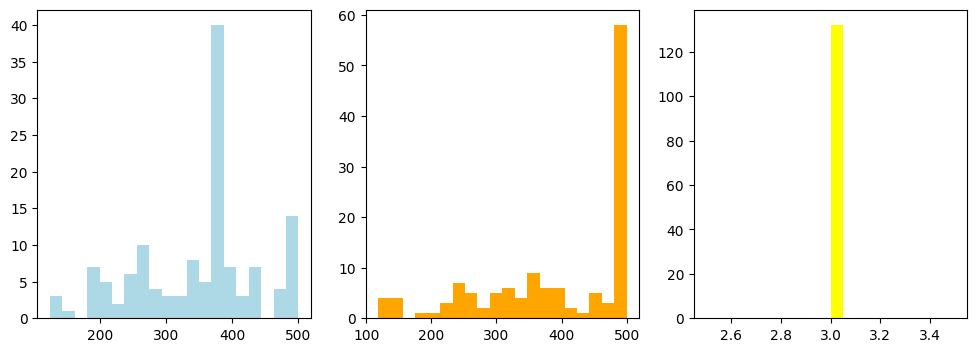

In [2]:
heights=[s[0] for s in img_shapes]
widths=[s[1] for s in img_shapes]
channels=[s[2] for s in img_shapes]

plt.figure(figsize=(12,4))

plt.subplot(1,3,1)
plt.hist(heights,bins=20,color='lightblue')

plt.subplot(1,3,2)
plt.hist(widths,bins=20,color='orange')

plt.subplot(1,3,3)
plt.hist(channels,bins=20,color='yellow')

plt.show()

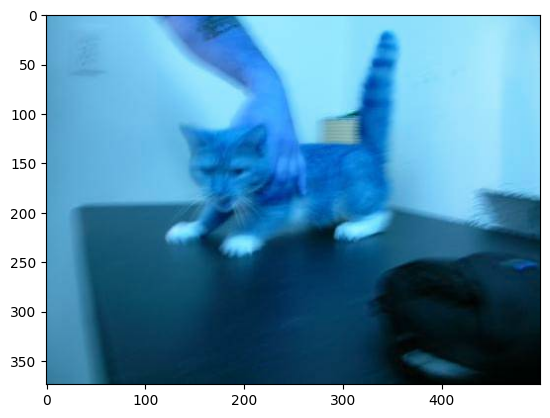

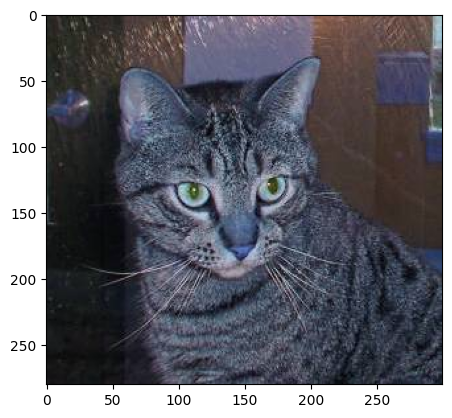

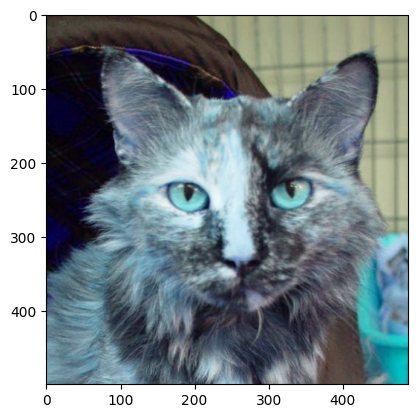

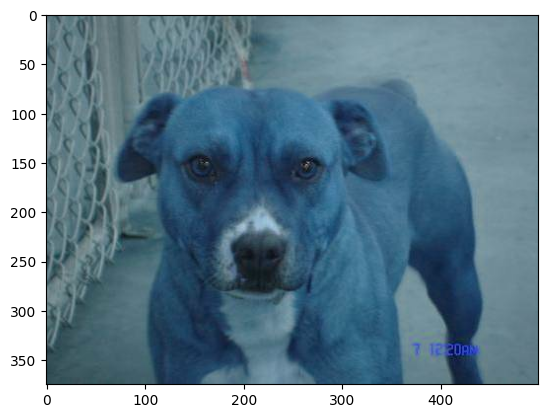

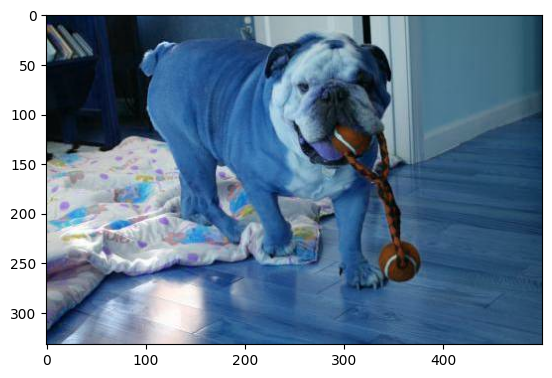

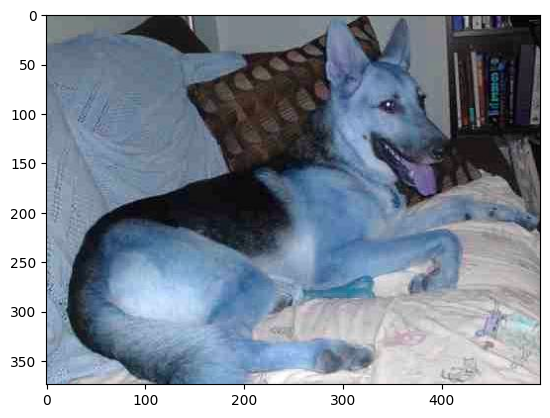

In [5]:
#First 3 Dog and Cat Images
for label in classes:
    label_dir=os.path.join(dataset_path,label)
    imgs=os.listdir(label_dir)
    img_cnts[label]=len(imgs)

    for img_file in imgs[:3]:
        img_path=os.path.join(label_dir,img_file)
        image=cv2.imread(img_path)
        if image is not None:
            plt.imshow(image)
            plt.show()


In [6]:
all_pixels=np.concatenate(all_pixels)
all_pixels

array([ 87, 164, 203, ..., 186, 158, 134], dtype=uint8)

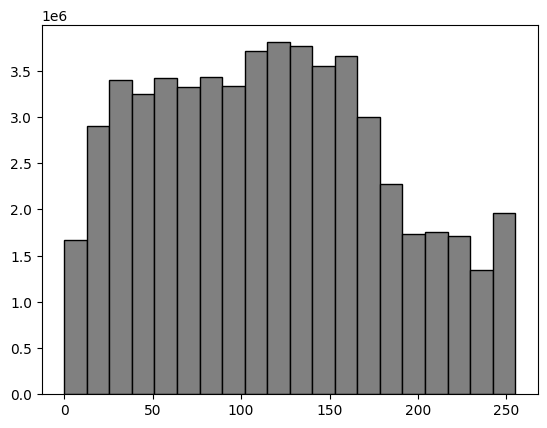

In [7]:
plt.hist(all_pixels,bins=20,color='gray',edgecolor='black')
plt.show()

In [8]:
#Stats of pixel values
print("Pixel Value Summary:")
print("Min:", np.min(all_pixels))
print("Max:", np.max(all_pixels))
print("Mean:", np.mean(all_pixels))
print("Std Dev:", np.std(all_pixels))

Pixel Value Summary:
Min: 0
Max: 255
Mean: 116.7607045060466
Std Dev: 65.6210385103431


### EDA ON TEXT DATA

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
import warnings
warnings.filterwarnings("ignore")

In [48]:
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     E:\Xai_Req_Setup\.jupyter_env\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     E:\Xai_Req_Setup\.jupyter_env\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [49]:
df = pd.read_csv('twitter_training.csv', encoding='latin-1')  # adjust path
df.columns=['Tweet ID','entity','sentiment','Tweet content']
df.head()

Tweet ID       entity sentiment  \
0      2401  Borderlands  Positive   
1      2401  Borderlands  Positive   
2      2401  Borderlands  Positive   
3      2401  Borderlands  Positive   
4      2401  Borderlands  Positive   

                                       Tweet content  
0  I am coming to the borders and I will kill you...  
1  im getting on borderlands and i will kill you ...  
2  im coming on borderlands and i will murder you...  
3  im getting on borderlands 2 and i will murder ...  
4  im getting into borderlands and i can murder y...

In [54]:
df['sentiment'].value_counts()

sentiment
Negative      22542
Positive      20831
Neutral       18318
Irrelevant    12990
Name: count, dtype: int64

In [62]:
df = df[['sentiment', 'Tweet content']]  # Keep only necessary columns
df.columns = ['sentiment', 'Tweet content']

In [63]:
df['Length']=df['Tweet content'].str.len()


In [64]:
def word_cnt(tweet):
    words=str(tweet).split()
    return len(words)
df['word_cnt']=df['Tweet content'].apply(word_cnt)


In [65]:
df.head()

sentiment                                      Tweet content  Length  \
0  Positive  I am coming to the borders and I will kill you...    51.0   
1  Positive  im getting on borderlands and i will kill you ...    50.0   
2  Positive  im coming on borderlands and i will murder you...    51.0   
3  Positive  im getting on borderlands 2 and i will murder ...    57.0   
4  Positive  im getting into borderlands and i can murder y...    53.0   

   word_cnt  
0        12  
1        10  
2        10  
3        12  
4        10

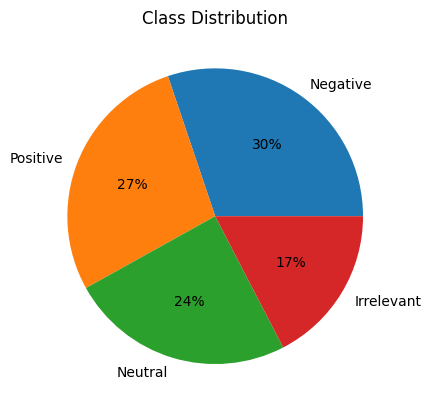

In [72]:
plt.pie(df['sentiment'].value_counts(), labels=df['sentiment'].value_counts().index, autopct='%d%%')
plt.title('Class Distribution')
plt.show()

In [20]:
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

In [21]:
def preprocess(text):
    # Lowercase
    text=str(text)
    text = text.lower()
    
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Tokenize
    tokens = text.split()
    # Remove stopwords
    tokens = [t for t in tokens if t not in stop_words]
    # Lemmatize + Stem
    tokens = [stemmer.stem(lemmatizer.lemmatize(t)) for t in tokens]
    return ' '.join(tokens)

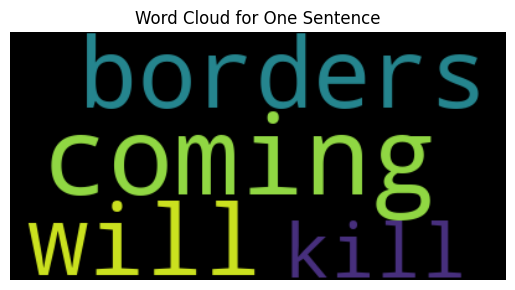

In [80]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Select a specific sentence from the 'Tweet content' column (for example, the first sentence)
sentence = df['Tweet content'].iloc[0]  # You can change the index or specify any other sentence

# Generate the word cloud for the selected sentence
wc = WordCloud().generate(sentence)

# Plot the word cloud
plt.imshow(wc, interpolation='bilinear')
plt.title('Word Cloud for One Sentence')
plt.axis('off')
plt.show()


In [81]:
df['clean_text'] = df['Tweet content'][:50].apply(preprocess)

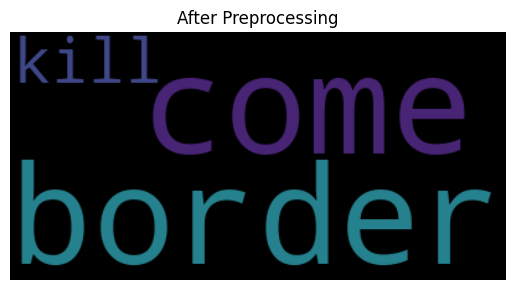

In [82]:
wc = WordCloud().generate(df['clean_text'].iloc[0])
plt.imshow(wc, interpolation='bilinear')
plt.title('After Preprocessing')
plt.axis('off')
plt.show()

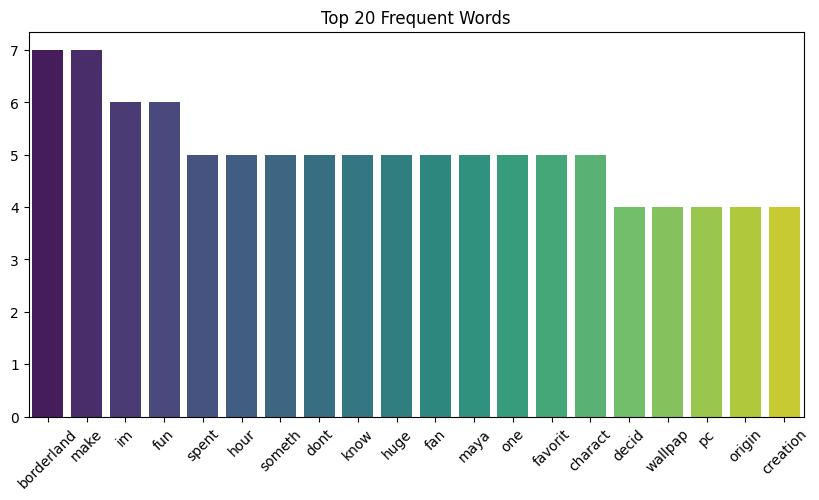

In [86]:
from collections import Counter
words = ' '.join(df['clean_text'][:10]).split()
word_freq = Counter(words).most_common(20)

# Separate words and counts manually
words = [item[0] for item in word_freq]
counts = [item[1] for item in word_freq]
plt.figure(figsize=(10, 5))
sns.barplot(x=list(words), y=list(counts), palette='viridis')
plt.title("Top 20 Frequent Words")
plt.xticks(rotation=45)
plt.show()

In [89]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC

# Split data
X_train_full, X_test_full, y_train_full, y_test_full = train_test_split(
    df['Tweet content'], df['sentiment'], test_size=0.2, random_state=42)

# Clean the text data
X_train_full = X_train_full.fillna("").astype(str)
X_test_full = X_test_full.fillna("").astype(str)

# Subset the data for faster training (optional)
X_train = X_train_full[:200]
y_train = y_train_full[:200]

X_test = X_test_full[:80]
y_test = y_test_full[:80]

# Vectorization
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# SVM Classifier
model = SVC(probability=True)
model.fit(X_train_vec, y_train)

# Predictions
y_pred = model.predict(X_test_vec)


In [90]:

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.4

Classification Report:
               precision    recall  f1-score   support

  Irrelevant       1.00      0.06      0.12        16
    Negative       0.38      0.15      0.21        20
     Neutral       1.00      0.07      0.12        15
    Positive       0.39      0.93      0.55        29

    accuracy                           0.40        80
   macro avg       0.69      0.30      0.25        80
weighted avg       0.62      0.40      0.30        80



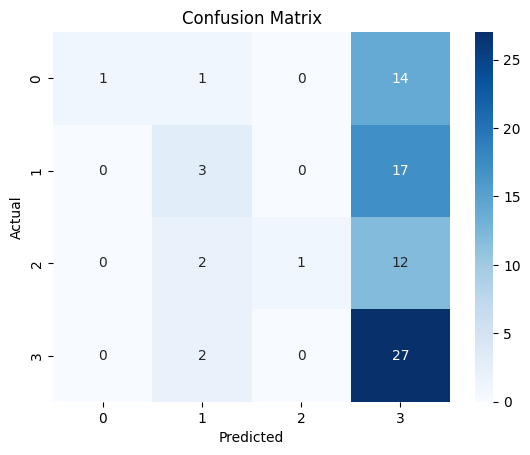

In [91]:
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

## EXP3 -- PDP,LRP,GRADCAM,Surrogate Exp

#### 1.PDP

In [17]:
import numpy as np
import pandas as pd
from sklearn.inspection import PartialDependenceDisplay
from sklearn.ensemble import RandomForestClassifier

In [18]:
df=pd.read_csv('diabetes.csv')

In [19]:
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [20]:
from sklearn.model_selection import train_test_split
X = df.drop('Outcome', axis=1)
y = df['Outcome']
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42)

In [21]:
rf_model=RandomForestClassifier()
rf_model.fit(X_train,y_train)
y_pred=rf_model.predict(X_test)

In [22]:
from sklearn.metrics import accuracy_score
acc=accuracy_score(y_test,y_pred)
print(acc)

0.75


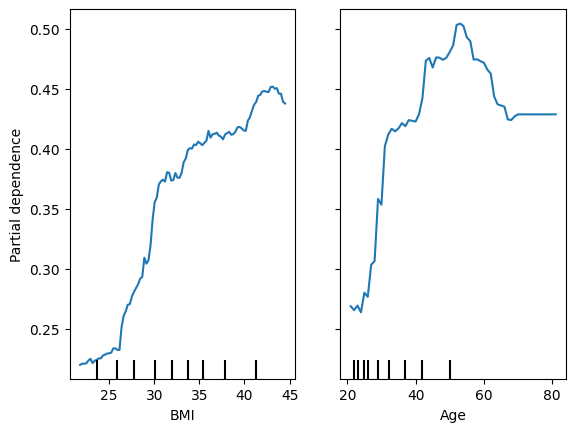

In [23]:
PartialDependenceDisplay.from_estimator(rf_model, X_train, ['BMI','Age'])

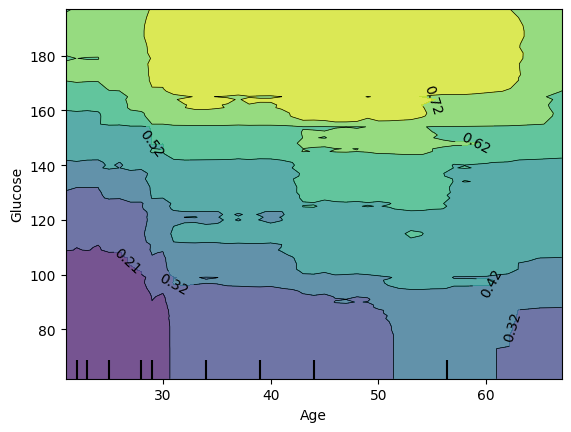

In [24]:
PartialDependenceDisplay.from_estimator(rf_model, X_test, [('Age','Glucose')])

#### GRADCAM (in last dense layer we will mention number of classes)

In [1]:
import tensorflow as tf

In [5]:
import numpy as np
import pandas as pd

from tensorflow.keras.layers import Dense,Flatten,MaxPool2D,Conv2D,Input
from tensorflow.keras.models import Model
from sklearn.model_selection import train_test_split

In [6]:
from tf_keras_vis.utils.scores import CategoricalScore
from tf_keras_vis.utils.model_modifiers import ReplaceToLinear
from tf_keras_vis.gradcam import Gradcam
from tensorflow.keras.preprocessing.image import load_img,img_to_array

In [7]:
# Load and normalize the data (with a validation split)
full_ds = tf.keras.utils.image_dataset_from_directory(
    'cat_dog',
    image_size=(228, 228),
    # color_mode='grayscale',
    # seed=123
).map(lambda x, y: (x / 255.0, y))

# Convert the dataset to numpy arrays
x_full, y_full = [], []
for images, labels in full_ds:
    x_full.append(images.numpy())
    y_full.append(labels.numpy())
x_full = np.concatenate(x_full, axis=0)
y_full = np.concatenate(y_full, axis=0)

# Split the data into training and testing sets (80% train, 20% test)
x_train, x_test, y_train, y_test = train_test_split(x_full, y_full, test_size=0.3, random_state=42)

# Optional: Print the shape of the data to verify
print(f"x_train shape: {x_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"x_test shape: {x_test.shape}")
print(f"y_test shape: {y_test.shape}")


Found 132 files belonging to 2 classes.
x_train shape: (92, 228, 228, 3)
y_train shape: (92,)
x_test shape: (40, 228, 228, 3)
y_test shape: (40,)


In [8]:

def build_cnn(inp_shape=(228,228,3),num_cls=2):
    inp=Input(shape=inp_shape)
    x=Conv2D(16,(3,3),activation='relu')(inp)
    x=MaxPool2D((2,2))(x)
    x=Conv2D(32,(3,3),activation='relu')(x)
    x=MaxPool2D((2,2))(x)
    x=Conv2D(32,(3,3),activation='relu')(x)
    x=MaxPool2D((2,2))(x)
    x=Flatten()(x)
    x=Dense(64,activation='relu')(x)
    outputs=Dense(num_cls,activation='softmax')(x)
    model=Model(inputs=inp,outputs=outputs)
    return model

model = build_cnn()
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=10, batch_size=64, validation_split=0.1)

Epoch 1/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 10s 2s/step - accuracy: 0.5429 - loss: 0.8909 - val_accuracy: 0.7000 - val_loss: 0.6600
Epoch 2/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - accuracy: 0.6282 - loss: 0.6835 - val_accuracy: 0.3000 - val_loss: 0.9858
Epoch 3/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 998ms/step - accuracy: 0.4356 - loss: 0.8200 - val_accuracy: 0.6000 - val_loss: 0.6866
Epoch 4/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 1s/step - accuracy: 0.7001 - loss: 0.6653 - val_accuracy: 0.7000 - val_loss: 0.6447
Epoch 5/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 963ms/step - accuracy: 0.5644 - loss: 0.6556 - val_accuracy: 0.7000 - val_loss: 0.6588
Epoch 6/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - accuracy: 0.5696 - loss: 0.6334 - val_accuracy: 0.7000 - val_loss: 0.6840
Epoch 7/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 966ms/step - accuracy: 0.6178 - loss: 0.6007 - val_accuracy: 0.4000 - val_loss: 0.7266
Epoch 8/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 973ms/step - accuracy: 0.8631 - loss: 0.5731 - val_accuracy: 0.4000 - val_loss: 0.7474
Epo

In [9]:
# img_path = x_test[0]
img = x_test[0]
img_array = img_to_array(img) / 255.0
img_input = np.expand_dims(img_array, axis=0)

# 4. Apply Grad-CAM
score = CategoricalScore([np.argmax(model.predict(img_input))])
gm = Gradcam(model, model_modifier=ReplaceToLinear())
cam = gm(score, img_input, penultimate_layer=-1)
print(np.argmax(model.predict(img_input)),f"Original:{y_test[0]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step
1 Original:0


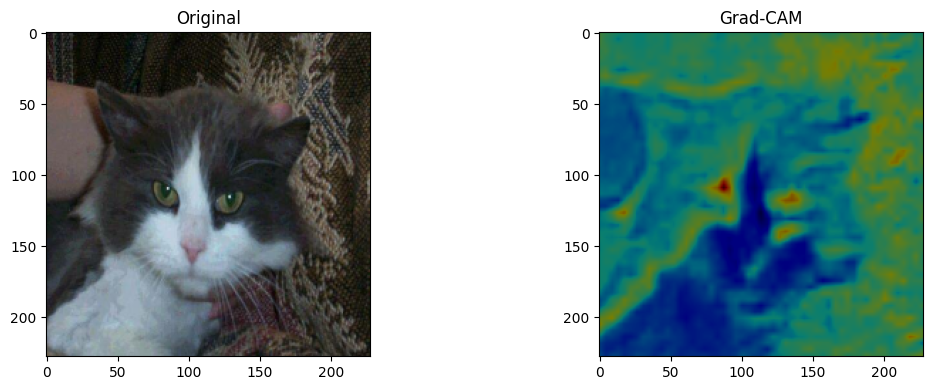

In [10]:
import matplotlib.pyplot as plt
f, ax = plt.subplots(1, 2, figsize=(12, 4))
ax[0].imshow(img)
ax[0].set_title("Original")
ax[1].imshow(img_array)
ax[1].imshow(cam[0], cmap='jet', alpha=0.5)
ax[1].set_title("Grad-CAM")
plt.tight_layout()
plt.show()

#### LRP Gray Scale is needed and Saliency map

In [28]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Load and preprocess dataset
full_ds = tf.keras.utils.image_dataset_from_directory(
    r'cat_dog',         # Root folder with subfolders as class names
    image_size=(228, 228),
    color_mode='grayscale'                       # Any batch size works
).map(lambda x, y: (x / 255.0, y))      

# Convert dataset to numpy arrays
x_full, y_full = [], []
for images, labels in full_ds:
    x_full.append(images.numpy())
    y_full.append(labels.numpy())
x_full = np.concatenate(x_full, axis=0)
y_full = np.concatenate(y_full, axis=0)

# Train-test split
x_train, x_test, y_train, y_test = train_test_split(x_full, y_full, test_size=0.3, random_state=42)

# CNN model definition
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(16, 3, activation='relu', input_shape=(228, 228, 1)),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(32, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(64, 3, activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compile and train the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=5)

Found 132 files belonging to 2 classes.


E:\Xai_Req_Setup\Python3109\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 0.4338 - loss: 1.7090
Epoch 2/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - accuracy: 0.4993 - loss: 0.8772
Epoch 3/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - accuracy: 0.6279 - loss: 0.6962
Epoch 4/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - accuracy: 0.6783 - loss: 0.6388
Epoch 5/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - accuracy: 0.5686 - loss: 0.6537


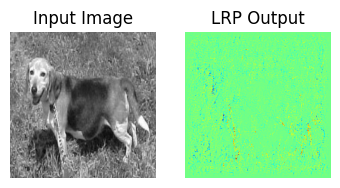

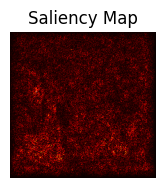

In [27]:
img = x_test[0]
img_tensor = tf.convert_to_tensor([img])  # Make it a batch
with tf.GradientTape() as tape:
    tape.watch(img_tensor)
    preds = model(img_tensor)
    class_idx = tf.argmax(preds[0])
    loss = preds[0, class_idx]

grads = tape.gradient(loss, img_tensor)[0].numpy()
relevance = grads * img  # Gradient × Input relevance
saliency = np.max(np.abs(grads), axis=-1)

# Visualize input and relevance map
plt.subplot(1, 3, 1)
plt.imshow(img, cmap='gray')
plt.title("Input Image")
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(relevance,cmap='jet')
plt.title("LRP Output")
plt.axis('off')
plt.show()

plt.subplot(1, 3, 3)
plt.imshow(saliency,cmap='hot')
plt.title("Saliency Map")
plt.axis('off')
plt.show()

##### For Custom Image

In [19]:
from tensorflow.keras.preprocessing.image import load_img,img_to_array
img=load_img('lion.jpg',target_size=(228, 228)
            ,color_mode='grayscale'
            )
img=img_to_array(img)/255.0
img_batch=np.expand_dims(img,axis=0)

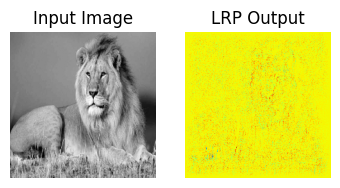

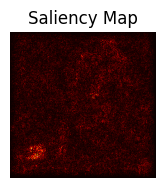

In [20]:
img_tensor = tf.convert_to_tensor(img_batch)  # Make it a batch
with tf.GradientTape() as tape:
    tape.watch(img_tensor)
    preds = model(img_tensor)
    class_idx = tf.argmax(preds[0])
    loss = preds[0, class_idx]

grads = tape.gradient(loss, img_tensor)[0].numpy()
relevance = grads * img  # Gradient × Input relevance
saliency = np.max(np.abs(grads), axis=-1)

# Visualize input and relevance map
plt.subplot(1, 3, 1)
plt.imshow(img, cmap='gray')
plt.title("Input Image")
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(relevance,cmap='jet')
plt.title("LRP Output")
plt.axis('off')
plt.show()

plt.subplot(1, 3, 3)
plt.imshow(saliency,cmap='hot')
plt.title("Saliency Map")
plt.axis('off')
plt.show()

#### SURROGATE EXPLAINER

In [14]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [15]:
df=pd.read_csv('diabetes.csv')

In [16]:
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [17]:
df.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

In [18]:
rf_model=RandomForestClassifier()
X=df.drop('Outcome',axis=1)
y=df['Outcome']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
rf_model.fit(X_train,y_train)

y_pred=rf_model.predict(X_test)
print(accuracy_score(y_test,y_pred))

0.7337662337662337


In [19]:
dt_model=DecisionTreeClassifier()
dt_model.fit(X_test,y_pred)

DecisionTreeClassifier()

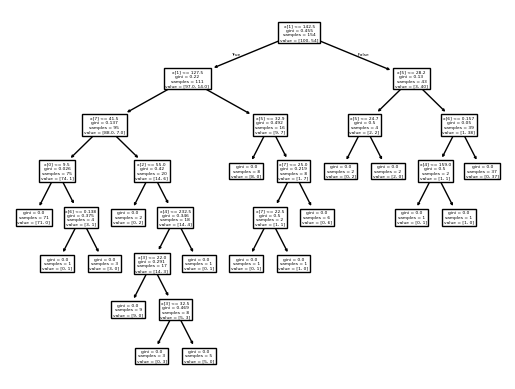

In [20]:
plot_tree(dt_model)
plt.show()

## EXP-4 FEATURE IMPORTANCE & SENSITIVITY ANALYSIS

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

In [3]:
df=pd.read_csv('diabetes.csv')

In [4]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42)
model=RandomForestClassifier()
model.fit(X_train,y_train)

RandomForestClassifier()

<BarContainer object of 8 artists>

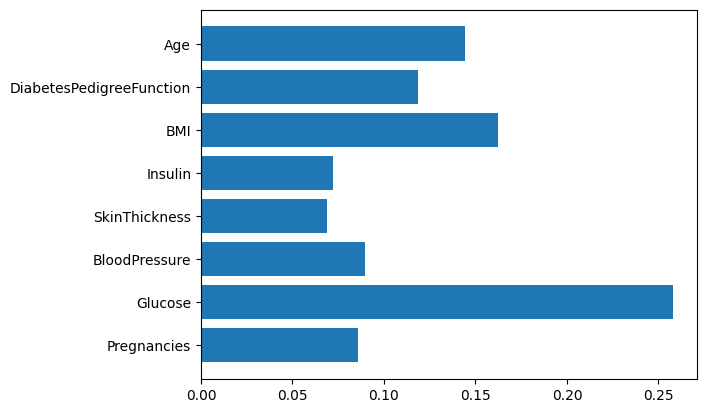

In [5]:
import matplotlib.pyplot as plt

y_pred=model.predict(X_test)

feat_imp=model.feature_importances_
feat=X.columns
plt.barh(feat,feat_imp)

Baseline Accuracy: 0.7552


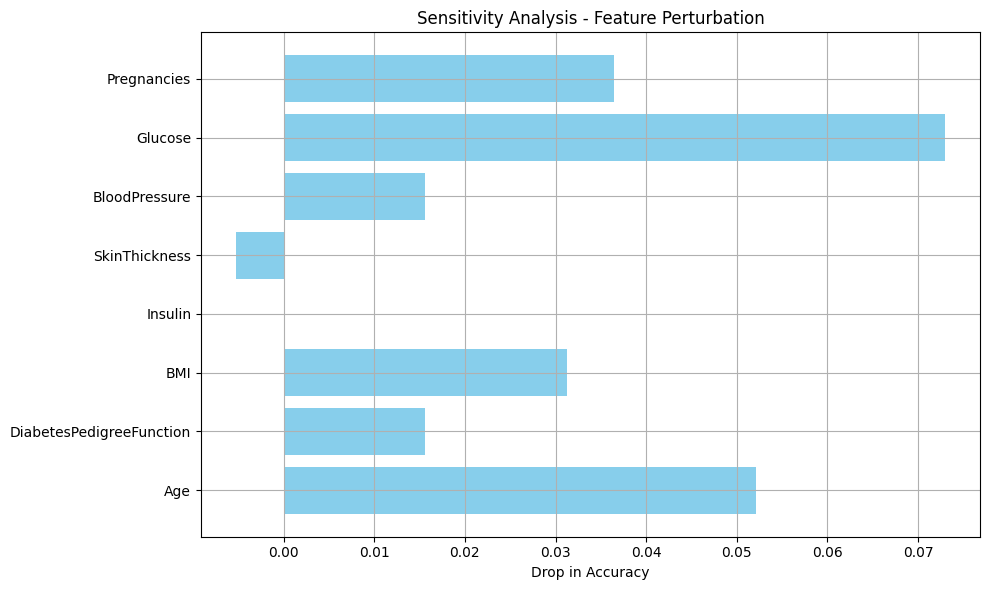

In [7]:
# Baseline accuracy
baseline_pred = model.predict(X_test)
baseline_acc = accuracy_score(y_test, baseline_pred)
print(f"Baseline Accuracy: {baseline_acc:.4f}")

# Sensitivity Analysis: Perturb one feature at a time
sensitivity = {}

for col in X.columns:
    X_test_perturbed = X_test.copy()
    X_test_perturbed[col] += X_test_perturbed[col].std()  # Add one std deviation

    perturbed_pred = model.predict(X_test_perturbed)
    perturbed_acc = accuracy_score(y_test, perturbed_pred)
    
    sensitivity[col] = baseline_acc - perturbed_acc

# Convert to DataFrame
sensitivity_df = pd.DataFrame(list(sensitivity.items()), columns=['Feature', 'Accuracy Drop'])

# Plot
plt.figure(figsize=(10, 6))
plt.barh(sensitivity_df['Feature'], sensitivity_df['Accuracy Drop'], color='skyblue')
plt.xlabel('Drop in Accuracy')
plt.title('Sensitivity Analysis - Feature Perturbation')
plt.gca().invert_yaxis()
plt.grid(True)
plt.tight_layout()
plt.show()


Baseline Accuracy: 0.7552
Pregnancies: Accuracy drop = -0.0052
Glucose: Accuracy drop = -0.0104
BloodPressure: Accuracy drop = -0.0052
SkinThickness: Accuracy drop = 0.0052
Insulin: Accuracy drop = 0.0000
BMI: Accuracy drop = 0.0000
DiabetesPedigreeFunction: Accuracy drop = 0.0000
Age: Accuracy drop = 0.0000


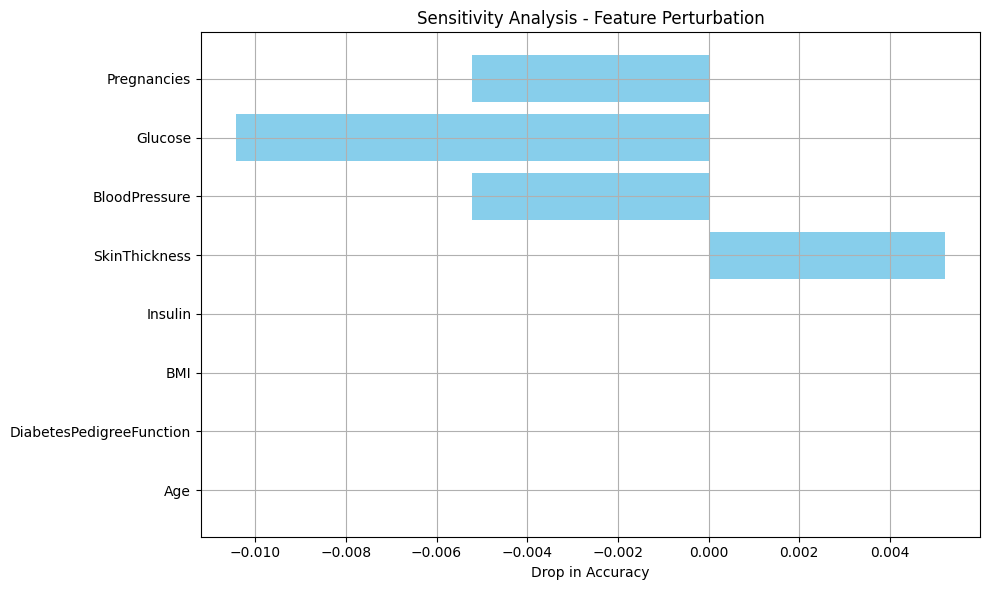

In [8]:
# Baseline accuracy
baseline_pred = model.predict(X_test)
baseline_acc = accuracy_score(y_test, baseline_pred)
print(f"Baseline Accuracy: {baseline_acc:.4f}")

# Sensitivity Analysis: Perturb one feature at a time
sensitivity = {}

for col in X.columns:
    X_test_perturbed = X_test.copy()
    X_test_perturbed[col] += .01  # Add one std deviation

    perturbed_pred = model.predict(X_test_perturbed)
    perturbed_acc = accuracy_score(y_test, perturbed_pred)
    print(f'{col}: Accuracy drop = {baseline_acc - perturbed_acc:.4f}')
    sensitivity[col] = baseline_acc - perturbed_acc

# Convert to DataFrame
sensitivity_df = pd.DataFrame(list(sensitivity.items()), columns=['Feature', 'Accuracy Drop'])

# Plot
plt.figure(figsize=(10, 6))
plt.barh(sensitivity_df['Feature'], sensitivity_df['Accuracy Drop'], color='skyblue')
plt.xlabel('Drop in Accuracy')
plt.title('Sensitivity Analysis - Feature Perturbation')
plt.gca().invert_yaxis()
plt.grid(True)
plt.tight_layout()
plt.show()


## EXP6 - LIME 

#### LIME - TABULAR DATA

In [1]:
import lime
import pandas as pd
import lime.lime_tabular
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
df=pd.read_csv('diabetes.csv')

In [2]:
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [3]:
X=df.drop('Outcome',axis=1)
y=df['Outcome']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
model=RandomForestClassifier()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.81      0.80        99
           1       0.65      0.64      0.64        55

    accuracy                           0.75       154
   macro avg       0.72      0.72      0.72       154
weighted avg       0.75      0.75      0.75       154



In [4]:
lime_exp=lime.lime_tabular.LimeTabularExplainer(
    training_data=X_train.values,
    feature_names=X_train.columns,
    class_names=['Diabetes','No Diabetes'],
    mode='classification'
)

exp=lime_exp.explain_instance(X_test.iloc[0].values,model.predict_proba)
exp.show_in_notebook()

E:\Xai_Req_Setup\Python3109\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


#### LIME - TEXT DATA

In [3]:
import lime 
import lime.lime_text
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
import pandas as pd
df=pd.read_csv('sms.tsv',sep='\t',names=['senti','Desc'])

In [4]:
df.head()

senti                                               Desc
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...

In [5]:
df['senti'].map({'ham':1,'spam':0})

0       1
1       1
2       0
3       1
4       1
       ..
5567    0
5568    1
5569    1
5570    1
5571    1
Name: senti, Length: 5572, dtype: int64

In [6]:
df.head()
df.dropna(inplace=True)

In [7]:
X=df['Desc']
y=df['senti']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

tfidf=TfidfVectorizer()
model=LogisticRegression()
mod_pip=make_pipeline(tfidf,model)
mod_pip.fit(X_train,y_train)

Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer()),
                ('logisticregression', LogisticRegression())])

In [12]:
lime_exp=lime.lime_text.LimeTextExplainer(class_names=['Positive','Negative'])
query=X_train.iloc[5]
exp=lime_exp.explain_instance(
    query,
    mod_pip.predict_proba,
)
exp.show_in_notebook()   

#### LIME - ON IMAGE

In [1]:
import tensorflow as tf

In [2]:
from lime import lime_image
from skimage.segmentation import mark_boundaries
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.mobilenet import preprocess_input
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
import numpy as np
import os
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout

E:\Xai_Req_Setup\Python3109\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


  0%|          | 0/10 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 570ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.003921569..1.0].


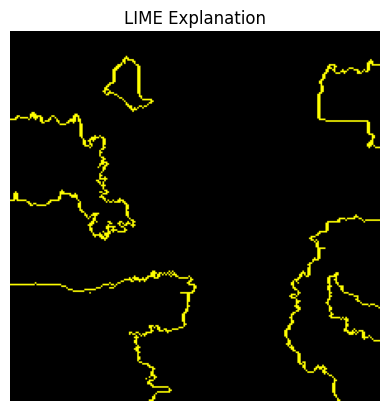

In [3]:
# Your CNN model
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D(2, 2),
    
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    
    Flatten(),
    Dropout(0.5),
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')
])

img_path = 'cats_dogs/cats/cat.1.jpg'
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_preprocessed = preprocess_input(np.expand_dims(img_array, axis=0))

explainer = lime_image.LimeImageExplainer()
explanation = explainer.explain_instance(
    image=img_array,
    classifier_fn=lambda x: model.predict(preprocess_input(x)),
    num_samples=10
)

# Show explanation for top label
temp,mask = explanation.get_image_and_mask(
    label=explanation.top_labels[0],
    num_features=10,
)

plt.imshow(mark_boundaries(temp / 255.0, mask))
plt.title('LIME Explanation')
plt.axis('off')
plt.show()


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..0.94509804].


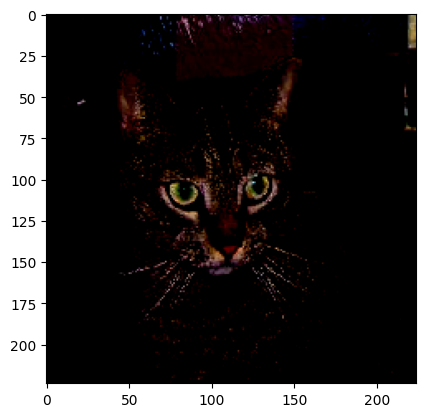

In [4]:
plt.imshow(temp)